In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
season = pd.read_csv('RegularSeasonStats.csv')
tourney = pd.read_csv('TourneyStats.csv')

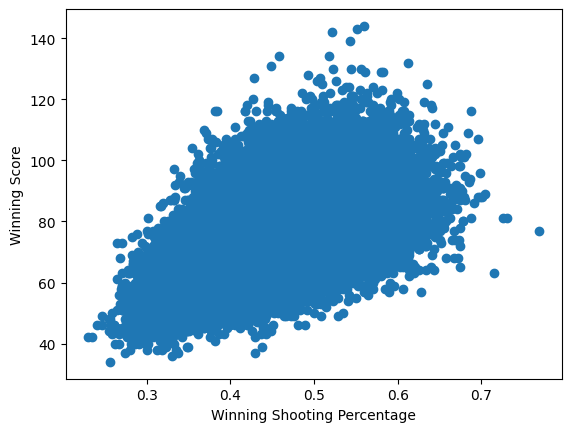

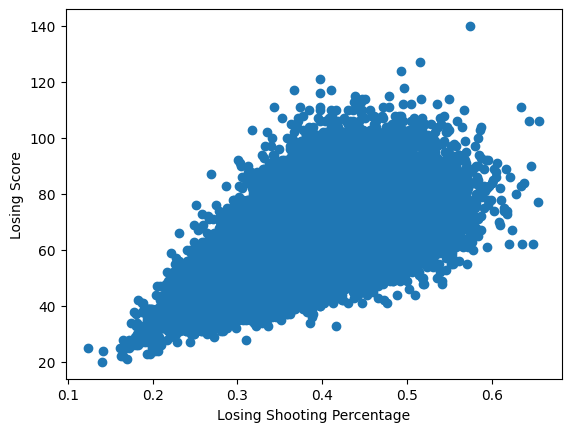

In [2]:
SWinShoot = season['WTS%']
SLoseShoot = season['LTS%']
SWinScore = season['WScore']
SLoseScore = season['LScore']

plt.scatter(SWinShoot, SWinScore)
plt.xlabel('Winning Shooting Percentage')
plt.ylabel('Winning Score')
plt.show()

plt.scatter(SLoseShoot, SLoseScore)
plt.xlabel('Losing Shooting Percentage')
plt.ylabel('Losing Score')
plt.show()

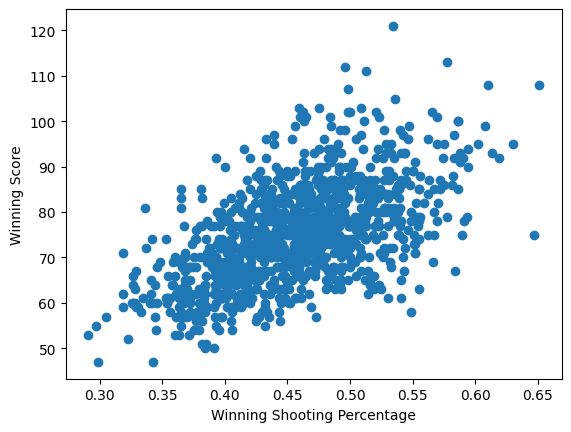

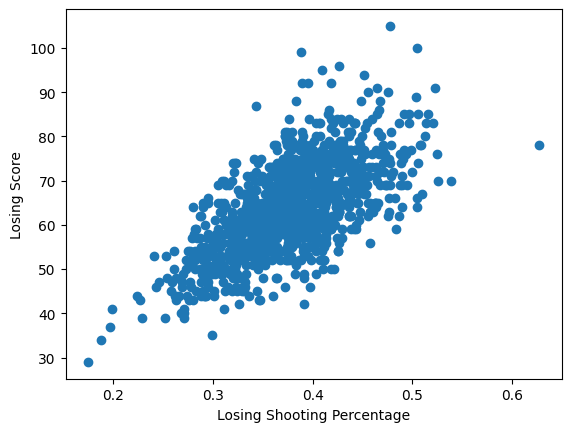

In [3]:
TWinShoot = tourney['WTS%']
TLoseShoot = tourney['LTS%']
TWinScore = tourney['WScore']
TLoseScore = tourney['LScore']

plt.scatter(TWinShoot, TWinScore)
plt.xlabel('Winning Shooting Percentage')
plt.ylabel('Winning Score')
plt.show()

plt.scatter(TLoseShoot, TLoseScore)
plt.xlabel('Losing Shooting Percentage')
plt.ylabel('Losing Score')
plt.show()

In [4]:
print('Season size: ', len(season), 'Tourney size: ', len(tourney))

Season size:  92832 Tourney size:  1115


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = season[['WTS%']]
y = season['WScore']

X_test = tourney[['WTS%']]
y_test = tourney['WScore']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on season data')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lr_model.intercept_)
print('   Coefficients', lr_model.coef_)
print('   Score', lr_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on tourney data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))


Results for linear regression on season data
  Default settings
Internal parameters:
   Bias is  28.413004369537596
   Coefficients [104.01830617]
   Score 0.29876896980335843
MAE is   7.290280606793912
RMSE is  9.295516654111227
MSE is  86.40662986685916
R^2     0.29876896980335843

Results for linear regression on tourney data
MAE is   6.826414807668703
RMSE is  8.746207385272957
MSE is  76.49614362620322
R^2     0.33041188878585115


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X = season[['WTS%']]
y = season['WScore']

X_test = tourney[['WTS%']]
y_test = tourney['WScore']

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
poly4 = PolynomialFeatures(degree=4, include_bias=False)
scale = StandardScaler()

lr_model = LinearRegression()
stages = [('imp_mean', imp_mean),
          ('poly4', poly4),
          ('scale', scale),
          ('lr_model', lr_model),
         ]
pipe_model = Pipeline(stages)
pipe_model.fit(X,y)

y_pred = pipe_model.predict(X)
print('Results for pipeline linear regression on training data')
#print('  Default settings')
#print('Internal parameters:')
print('   Bias is ', pipe_model.predict([[0]]))
#print('   Coefficients', pipe_model.coef_)
print('   Score', pipe_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = pipe_model.predict(X_test)
print()
print('Results for pipeline linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for pipeline linear regression on training data
   Bias is  [-38.89108116]
   Score 0.3065792621660077
MAE is   7.245525277053979
RMSE is  9.243605094676619
MSE is  85.44423514633154
R^2     0.3065792621660077

Results for pipeline linear regression on test data
MAE is   6.80977204414583
RMSE is  8.72466708448442
MSE is  76.11981573508585
R^2     0.33370597225026477


C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


### Decision Tree Model 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  
X = season[['WTS%']]
y = season['WScore']

X_test = tourney[['WTS%']]
y_test = tourney['WScore']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for decision tree on training data
  Default settings
Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy is   0.06543002412961048
Precision is  0.09977287201224949
Recall is     0.06543002412961048
F1 is         0.05934778307122828

Results for decision tree on test data
  Default settings
Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy is   0.054708520179372194
Precision is  0.07393444253209229
Recall is     0.054708520179372194
F1 is         0.049940512014548195


C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  
X = season[['WTS%']]
y = season['WScore']

X_test = tourney[['WTS%']]
y_test = tourney['WScore']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

### Neural Net Model

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = season[['WTS%']]
y = season['WScore']

X_test = tourney[['WTS%']]
y_test = tourney['WScore']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for NN on train data
  Default settings
Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy is   0.045803171320234405
Precision is  0.015919480636313196
Recall is     0.045803171320234405
F1 is         0.022507176521589106

Results for NN on test data
  Default settings
Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy is   0.05291479820627803
Precision is  0.01642757907685753
Recall is     0.05291479820627803
F1 is         0.02439935621718258


C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dec99\OneDrive\Documents\44-688\capstone\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
